In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def normaliza(array):
    mean = np.average(array)
    std = np.std(array)

    array_padronizado = (array - mean)/std

    return array_padronizado

In [7]:
def desnormaliza(array):
    mean = np.average(array)
    std = np.std(array)

    array_despadronizado = (array * std) + mean
    return array_despadronizado


In [8]:
def mse(erro, qtd_linhas):
    mse_valor = (np.sum(erro**2)) / ((2*qtd_linhas))

    return mse_valor

def rmse(erro, qtd_linhas):
    rmse_valor = np.sqrt(mse(erro, qtd_linhas))
    return rmse_valor


# Questão 1

In [9]:
artificial = pd.read_csv('artificial1d.csv', header=None)

artificial.head()

,0,1
0,-1.000000,-2.082017
1,-0.931034,-1.326980
2,-0.862069,-1.105598
3,-0.793103,-0.873946
4,-0.724138,-0.285027


In [10]:
artificial.describe()

,0,1
count,3.000000e+01,30.000000
mean,-2.960595e-17,0.067618
std,6.071316e-01,1.065356
min,-1.000000e+00,-2.082017
25%,-5.000000e-01,-0.870920
50%,0.000000e+00,0.098189
75%,5.000000e-01,0.957162
max,1.000000e+00,2.309838


In [11]:
x = (artificial[0].to_numpy())
y = (artificial[1].to_numpy())
n = x.shape[0]
x = np.column_stack([np.ones(n), x])

## Item a (OLS)

In [12]:
def ols(x,y,r = 0) -> np.array:
    qtd_atributos = x.shape[1]
    identidade = np.eye(qtd_atributos) # aqui é uma matriz identidade de cols x cols
    identidade[0][0] = 0
    transposta = x.T

    pesos = np.linalg.inv(transposta @ x + r*identidade) @ transposta @ y

    return pesos

pesos = ols(x,y)
print(f'w0: {pesos[0]} | w1: {pesos[1]}')

w0: 0.06761792463834032 | w1: 1.5748651690368312


In [13]:
y_pred = x @ pesos

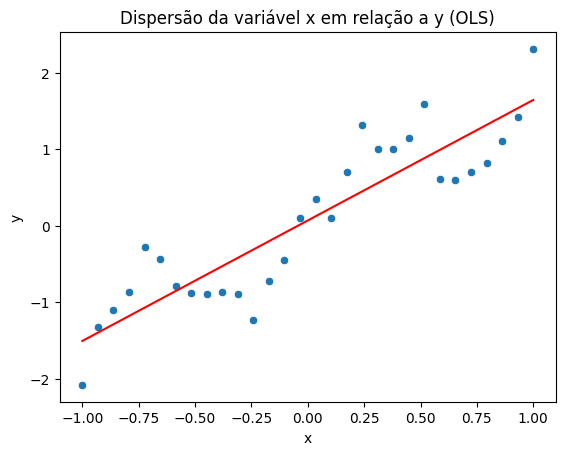

In [14]:
sns.scatterplot(x=x[:, 1], y=y)

plt.plot(x[:, 1], y_pred, color='red')
plt.title('Dispersão da variável x em relação a y (OLS)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Item b (GD)

In [40]:
def gd(x,y,r=0, passo_aprendizado=0.1, epochs=200) -> tuple:
    pesos = np.zeros(x.shape[1])
    n = x.shape[0]

    historico_mse = []

    t = 0
    while t <= epochs:
        t+=1
        y_pred = x @ pesos
        erro = (y - y_pred)

        mse_valor = mse(erro, qtd_linhas=n)
        historico_mse.append(mse_valor)


        gradientes = (1/n) * x.T @ erro - r*pesos[1:]
        pesos += passo_aprendizado * gradientes
        
        
    return pesos,historico_mse

In [41]:
pesos, hist_mse = gd(x,y)
print(f'w0: {pesos[0]} | w1: {pesos[1]}')

w0: 0.0676179245954058 | w1: 1.5737935813167823


In [42]:
y_pred = x @ pesos

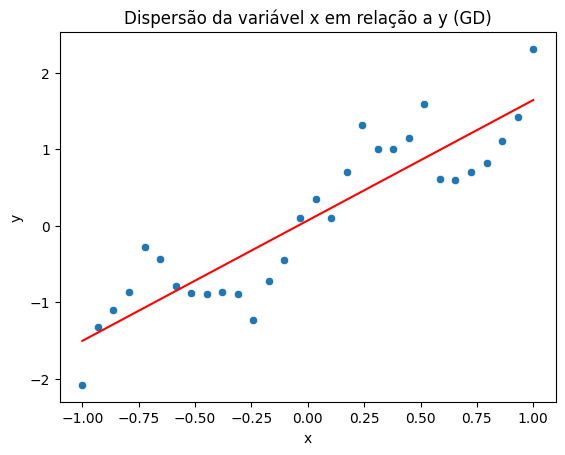

In [38]:
sns.scatterplot(x=x[:, 1], y=y)

plt.plot(x[:, 1], y_pred, color='red')
plt.title('Dispersão da variável x em relação a y (GD)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

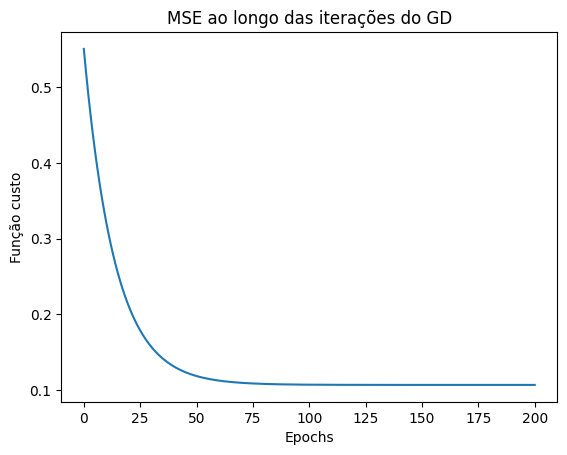

In [39]:
sns.lineplot(hist_mse)
plt.title('MSE ao longo das iterações do GD')
plt.xlabel('Epochs')
plt.ylabel('Função custo')
plt.show()

## Item c (SGD)

In [43]:
def sgd(x,y, r = 0,passo_aprendizado=0.1, epochs=200):
    pesos = np.zeros(x.shape[1])
    n = x.shape[0]

    historico_mse = []

    for _ in range(epochs):

        indices = np.random.permutation(n)
        x_permutado, y_permutado = x[indices], y[indices]

        for i in range(n):

            xi, yi = x_permutado[i], y_permutado[i]

            y_pred = xi @ pesos
            
            erro = yi - y_pred

            gradientes =  xi * erro
            pesos += passo_aprendizado * gradientes - r*pesos[1:]

        y_pred = x @ pesos
        erro = y - y_pred
        mse_valor = mse(erro, qtd_linhas=n)
        historico_mse.append(mse_valor)
        

    return pesos, historico_mse


In [44]:
pesos, hist_mse = sgd(x,y, passo_aprendizado=0.01)
print(f'w0: {pesos[0]} | w1:{pesos[1]}')

w0: 0.06515141123233009 | w1:1.5755881830184304


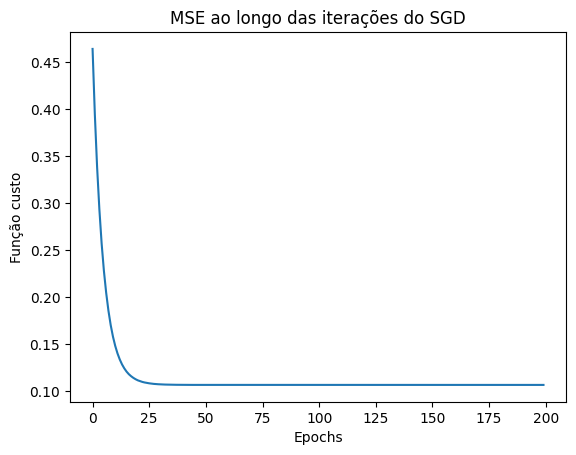

In [45]:
sns.lineplot(hist_mse)
plt.title('MSE ao longo das iterações do SGD')
plt.xlabel('Epochs')
plt.ylabel('Função custo')
plt.show()

In [23]:
y_pred = x @ pesos

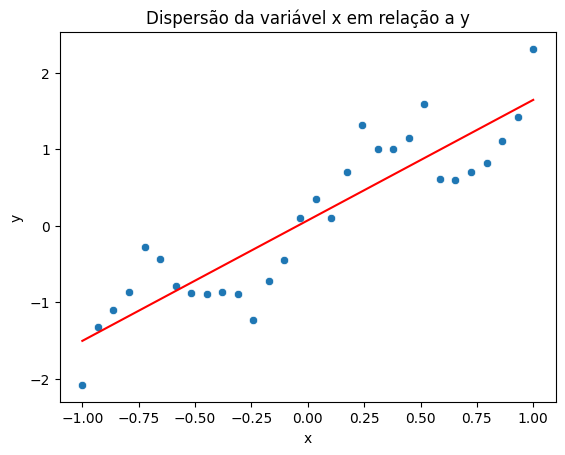

In [24]:
sns.scatterplot(x=x[:, 1], y=y)

plt.plot(x[:, 1], y_pred, color='red')
plt.title('Dispersão da variável x em relação a y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Questão 2

In [25]:
california = pd.read_csv('california.csv', header=None)
california.head()

,0,1,2,3,4,5,6,7,8
0,4.1685,20.0,6.700637,1.178344,745.0,2.372611,38.80,-121.15,2.175
1,2.8194,24.0,4.762500,1.020833,608.0,2.533333,36.75,-119.85,0.811
2,2.4250,46.0,4.927711,1.018072,772.0,2.325301,36.33,-119.31,0.849
3,3.1205,16.0,3.728477,1.101545,1260.0,2.781457,33.87,-117.99,1.740
4,4.3889,41.0,5.741007,1.199041,837.0,2.007194,34.15,-118.40,3.804


In [26]:
california.describe()

,0,1,2,3,4,5,6,7,8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.948099,28.733000,5.417844,1.087299,1423.847000,2.897038,35.765440,-119.708800,2.111088
std,1.873914,12.961239,1.875375,0.285668,1396.022801,0.763631,2.197077,2.023945,1.142300
min,0.706800,2.000000,1.411290,0.526316,9.000000,1.345506,32.550000,-124.180000,0.325000
25%,2.674075,18.000000,4.458198,1.006177,774.500000,2.408481,33.920000,-121.880000,1.242500
50%,3.667450,29.000000,5.281518,1.046735,1169.500000,2.794112,34.420000,-118.905000,1.850500
75%,4.788375,38.000000,6.031825,1.097236,1681.000000,3.248397,37.760000,-118.040000,2.695500
max,15.000000,52.000000,26.465969,5.424084,28566.000000,9.196203,41.860000,-115.490000,5.000010


In [46]:
def divide_treino_teste(dados, tamanho_treino=0.8):
    dados = dados.apply(normaliza)
    
    x = dados.iloc[:, :-1]
    y = dados.iloc[:, -1]
    
    n = x.shape[0] # qtd linhas
    
    q_treino = int(n * tamanho_treino)
    q_teste = n - q_treino
    x_treino = x.sample(q_treino)
    x_teste = x[~x.index.isin(x_treino.index)]

    y_treino = y.iloc[x_treino.index]
    y_teste = y.iloc[x_teste.index]

    x_treino = np.concatenate([np.ones((q_treino,1)), x_treino.to_numpy()], axis=1)
    x_teste = np.concatenate([np.ones((q_teste,1)),x_teste.to_numpy()], axis=1)
    y_treino = y_treino.to_numpy()
    y_teste = y_teste.to_numpy()

    return (x_treino, x_teste, y_treino, y_teste)

In [47]:
x_treino, x_teste, y_treino, y_teste = divide_treino_teste(california)

In [29]:
def reg_polim(x_treino,x_teste, y_treino, y_teste, p = 1, r = 0) -> tuple:
    
    x1 = x_treino
    x2 = x_teste
    n_treino = x1.shape[0]
    n_teste = x2.shape[0]

    for p1 in range(2, p+1):
        x1 = np.concatenate([x1, np.pow(x_treino[:,1:],p1)], axis=1)
        x2 = np.concatenate([x2, np.pow(x_teste[:,1:],p1)], axis=1)

    pesos = ols(x1, y_treino, r = r)

    y_pred_treino = x1 @ pesos
    erro_treino = desnormaliza(y_treino) - desnormaliza(y_pred_treino)
    rmse_treino = rmse(erro_treino, qtd_linhas=n_treino)

    y_pred_teste = x2 @ pesos
    erro_teste = desnormaliza(y_teste) - desnormaliza(y_pred_teste)
    rmse_teste = rmse(erro_teste, qtd_linhas=n_teste)

    return (pesos, rmse_treino, rmse_teste)



In [30]:
def cria_graficos_rmse(graus_polim, rmse_treino, rmse_teste, titulo=''):
    fig, ax = plt.subplots(1,2, figsize=(10,6))

    fig.suptitle(titulo)
    sns.lineplot(x = graus_polim, y=rmse_treino, ax=ax[0])
    ax[0].set_title('Treino')
    ax[0].set_xlabel('Graus do polinômio')
    ax[0].set_ylabel('Função custo (RMSE)')
    
    
    sns.lineplot(x = graus_polim, y=rmse_teste, ax=ax[1])
    ax[1].set_title('Teste')
    ax[1].set_xlabel('Graus do polinômio')
    ax[1].set_ylabel('Função custo (RMSE)')
    
    
    plt.tight_layout()
    plt.show()

In [31]:
dist_rmse_treino = []
dist_rmse_teste = []

for p in range(1,14):
    pesos, rmse_treino, rmse_teste = reg_polim(x_treino, x_teste, y_treino, y_teste, p)
    
    dist_rmse_teste.append(rmse_teste)
    dist_rmse_treino.append(rmse_treino)

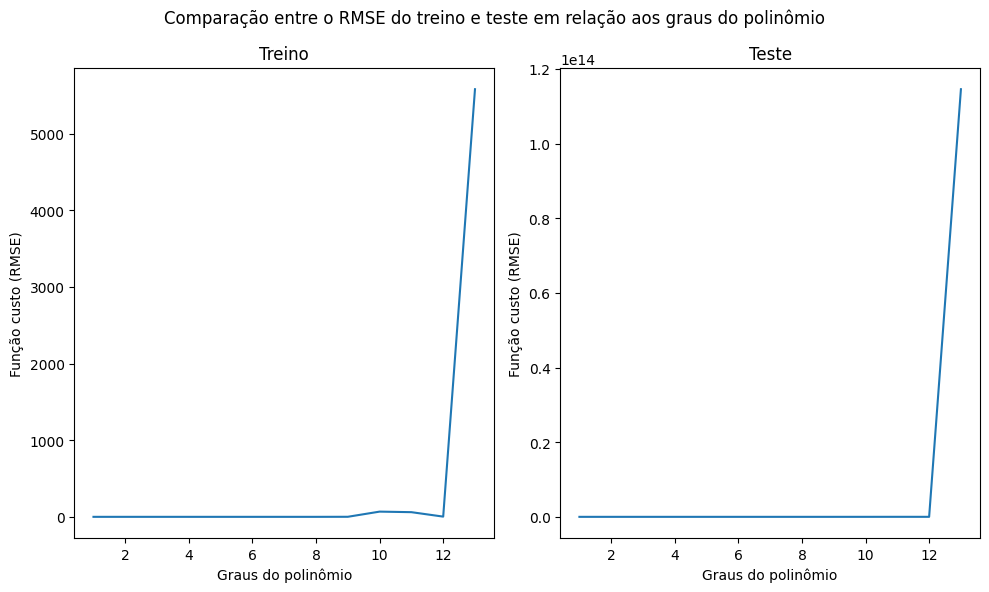

In [32]:
graus_polim = list(range(1,14))
titulo = 'Comparação entre o RMSE do treino e teste em relação aos graus do polinômio'
cria_graficos_rmse(graus_polim, dist_rmse_treino, dist_rmse_teste, titulo=titulo)

In [33]:
dist_rmse_treino_regularizado = []
dist_rmse_teste_regularizado = []

for p in range(1,14):
    pesos, rmse_treino, rmse_teste = reg_polim(x_treino, x_teste, y_treino, y_teste, p, r=0.01)
    
    dist_rmse_teste_regularizado.append(rmse_teste)
    dist_rmse_treino_regularizado.append(rmse_treino)



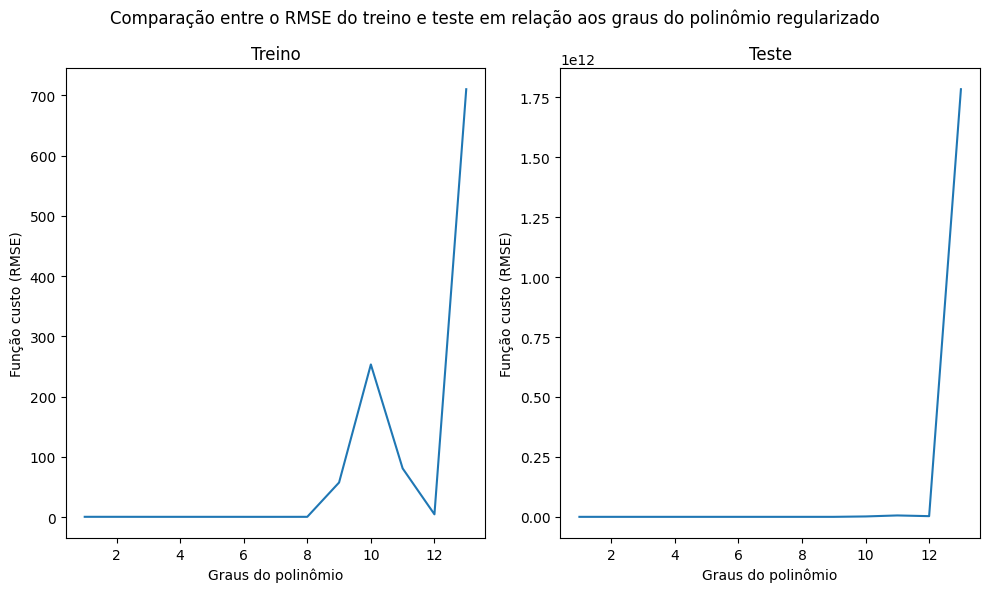

In [34]:
titulo = 'Comparação entre o RMSE do treino e teste em relação aos graus do polinômio regularizado'
cria_graficos_rmse(graus_polim, dist_rmse_treino_regularizado, dist_rmse_teste_regularizado, titulo=titulo)